In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models 
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255 
test_images = test_images.astype('float32') / 255 

from keras.utils import to_categorical 
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
encoder_input = tf.keras.Input(shape=(28, 28, 1), name='original_img') 

x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x) 

encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = tf.keras.Model(encoder_input, encoder_output, name='encoder') 
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 original_img (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

2022-10-13 14:50:45.655938: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
decoder_input = tf.keras.Input(shape=(16,), name='encoded_img') 

x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x) 

decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)
decoder = tf.keras.Model(decoder_input, decoder_output, name='decoder') 
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoded_img (InputLayer)    [(None, 16)]              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 1)           0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 6, 6, 16)         160       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 8, 8, 32)         4640      
 ranspose)                                                       
                                                                 
 up_sampling2d (UpSampling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                           

In [4]:
autoencoder_input = tf.keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = tf.keras.Model(autoencoder_input, decoded_img, name='autoencoder')
autoencoder.summary()


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 16)                18672     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         9569      
                                                                 
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________


In [5]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(train_images, train_images, epochs=5, batch_size=128, shuffle=True, validation_data=(test_images, test_images))

Epoch 1/5
469/469 [==============================] - 57s 118ms/step - loss: 0.0483 - val_loss: 0.0347
Epoch 2/5
469/469 [==============================] - 59s 126ms/step - loss: 0.0312 - val_loss: 0.0292
Epoch 3/5
469/469 [==============================] - 50s 106ms/step - loss: 0.0281 - val_loss: 0.0269
Epoch 4/5
469/469 [==============================] - 51s 110ms/step - loss: 0.0266 - val_loss: 0.0259
Epoch 5/5
469/469 [==============================] - 50s 107ms/step - loss: 0.0256 - val_loss: 0.0251


and the actual image looks like
1/1 [==============================] - 0s 232ms/step


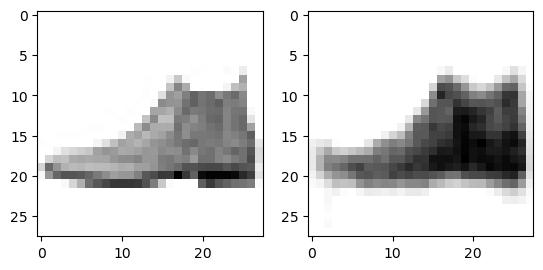

In [6]:
import matplotlib.pyplot as plt
print("and the actual image looks like")
img_out = autoencoder.predict(test_images[0].reshape(1,28,28,1)) 
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(test_images[0].reshape(28,28), cmap='Greys') 
axarr[1].imshow(img_out.reshape(28,28), cmap='Greys') 
plt.show()